In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
import numpy as np

In [304]:
train = pd.read_csv('../data/processed/train2017-contains.csv')
list(train)

['zoneID',
 'zoneArea',
 'MiscellaneousCount',
 'percentMiscellaneousArea',
 'StructureCount',
 'percentStructureArea',
 'Paved DitchCount',
 'percentPaved DitchArea',
 'SidewalkCount',
 'percentSidewalkArea',
 'Unpaved Athletic FieldCount',
 'percentUnpaved Athletic FieldArea',
 'Above Ground PoolCount',
 'percentAbove Ground PoolArea',
 'Paved ParkingCount',
 'percentPaved ParkingArea',
 'Paved DrivewayCount',
 'percentPaved DrivewayArea',
 'Gravel/SandpitCount',
 'percentGravel/SandpitArea',
 'Unpaved RoadCount',
 'percentUnpaved RoadArea',
 'Paved RoadCount',
 'percentPaved RoadArea',
 'TrailCount',
 'percentTrailArea',
 'PatioCount',
 'percentPatioArea',
 'BridgeCount',
 'percentBridgeArea',
 'DamCount',
 'percentDamArea',
 'TankCount',
 'percentTankArea',
 'Unpaved ParkingCount',
 'percentUnpaved ParkingArea',
 'In Ground PoolCount',
 'percentIn Ground PoolArea',
 'Recreation Court/Ball FieldCount',
 'percentRecreation Court/Ball FieldArea',
 'Unpaved DrivewayCount',
 'percentUnp

In [377]:
train['zoneType'].value_counts().sum()

7219

In [306]:
train.replace(0, np.nan, inplace=True)

In [307]:
colors = ['red','green','blue','purple']
colMap = matplotlib.colors.ListedColormap(colors)
le = preprocessing.LabelEncoder()
le.fit(list(train['zoneType']))
mappedLabels = le.transform(train['zoneType'])
train['mappedLabel'] = mappedLabels
le.classes_

array(['Commercial', 'Industrial', 'Residential', 'Special Purpose'],
      dtype='<U15')

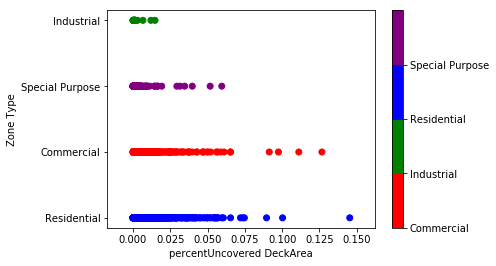

In [376]:
label = 'Uncovered Deck'
labelArea = 'percent' + label + 'Area'
labelCount = label + 'Count'
choice = labelArea
#plt.scatter(train.index, train[choice], c=train['mappedLabel'], cmap=colMap)
plt.scatter(train[choice], train['zoneType'], c=train['mappedLabel'], cmap=colMap)
plt.xlabel(choice)
plt.ylabel("Zone Type")
cb = plt.colorbar()
loc = np.arange(0,max(train['mappedLabel']),max(train['mappedLabel'])/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(le.classes_)

In [333]:
area_cols = [col for col in train.columns if 'percent' in col]
count_cols = [col for col in train.columns if 'Count' in col]
area_cols.append('zoneType')
count_cols.append('zoneType')
areaTrain = train[area_cols]
countTrain = train[count_cols]

In [334]:
industrialDataCount = countTrain[countTrain['zoneType']=='Industrial']
industrialDataArea = areaTrain[areaTrain['zoneType']=='Industrial']

residentialDataCount = countTrain[countTrain['zoneType']=='Residential']
residentialDataArea = areaTrain[areaTrain['zoneType']=='Residential']

commercialDataCount = countTrain[countTrain['zoneType']=='Commercial']
commercialDataArea = areaTrain[areaTrain['zoneType']=='Commercial']

sDataCount = countTrain[countTrain['zoneType']=='Special Purpose']
sDataArea = areaTrain[areaTrain['zoneType']=='Special Purpose']

In [372]:
industrialDataCount.drop(['zoneType'], axis=1).sum().sort_values().tail(20)

Unpaved RoadCount         10.0
Open SpaceCount           10.0
Covered DeckCount         12.0
TrailCount                13.0
In Ground PoolCount       14.0
Unpaved DrivewayCount     16.0
Paved DitchCount          17.0
Median > 10 FeetCount     19.0
Compacted SoilCount       19.0
Gravel/SandpitCount       27.0
Open StorageCount         30.0
CourtyardCount            41.0
Uncovered DeckCount       45.0
Paved DrivewayCount       57.0
Paved ParkingCount        63.0
TankCount                133.0
PatioCount               305.0
StructureCount           741.0
SidewalkCount            806.0
PavementCount            909.0
dtype: float64

In [371]:
industrialDataArea.drop(['zoneType'], axis=1).sum().sort_values().tail(20)

percentPaved RoadArea                      0.011299
percentIn Ground PoolArea                  0.021672
percentMiscellaneousArea                   0.027056
percentRecreation Court/Ball FieldArea     0.033134
percentUncovered DeckArea                  0.050644
percentUnpaved RoadArea                    0.056440
percentTankArea                            0.058350
percentOpen SpaceArea                      0.064845
percentUnpaved DrivewayArea                0.091680
percentPaved DrivewayArea                  0.131886
percentGravel/SandpitArea                  0.273320
percentUnpaved Athletic FieldArea          0.311493
percentOpen StorageArea                    0.423846
percentUnpaved ParkingArea                 0.444340
percentCompacted SoilArea                  0.453807
percentPatioArea                           0.483885
percentSidewalkArea                        0.522302
percentPavementArea                        0.633444
percentPaved ParkingArea                   0.756987
percentStruc

In [366]:
residentialDataCount.drop(['zoneType'], axis=1).sum().sort_values().tail(10)

CourtyardCount             350.0
Unpaved DrivewayCount      756.0
Covered DeckCount          862.0
Paved DrivewayCount       1948.0
In Ground PoolCount       2062.0
PavementCount             4930.0
Uncovered DeckCount       6290.0
SidewalkCount            21598.0
PatioCount               25289.0
StructureCount           83686.0
dtype: float64

In [361]:
residentialDataArea.drop(['zoneType'], axis=1).sum().sort_values().tail(10)

percentUnpaved Athletic FieldArea       2.986313
percentPaved ParkingArea                4.326514
percentUnpaved DrivewayArea             5.647255
percentIn Ground PoolArea               8.796732
percentPavementArea                    11.136464
percentPaved DrivewayArea              12.140557
percentUncovered DeckArea              14.376371
percentSidewalkArea                    25.714479
percentPatioArea                       62.901635
percentStructureArea                 1066.020773
dtype: float64

In [367]:
commercialDataCount.drop(['zoneType'], axis=1).sum().sort_values().tail(10)

Paved ParkingCount        145.0
CourtyardCount            154.0
In Ground PoolCount       162.0
Unpaved DrivewayCount     203.0
Paved DrivewayCount       206.0
Uncovered DeckCount       655.0
PatioCount               2287.0
PavementCount            2521.0
SidewalkCount            3789.0
StructureCount           7959.0
dtype: float64

In [368]:
commercialDataArea.drop(['zoneType'], axis=1).sum().sort_values().tail(10)

percentUnpaved DrivewayArea      1.795051
percentOpen StorageArea          2.556741
percentPaved DrivewayArea        2.618043
percentUncovered DeckArea        3.665382
percentUnpaved ParkingArea       3.685502
percentPaved ParkingArea         8.995516
percentPavementArea              9.482776
percentSidewalkArea             12.841526
percentPatioArea                15.638330
percentStructureArea           379.245381
dtype: float64

In [370]:
sDataArea.drop(['zoneType'], axis=1).sum().sort_values().tail(10)

percentOpen StorageArea                     1.572021
percentCompacted SoilArea                   1.950164
percentRecreation Court/Ball FieldArea      2.381300
percentPaved ParkingArea                    3.297440
percentPaved DrivewayArea                   3.720609
percentPavementArea                         3.748939
percentSidewalkArea                         4.438409
percentPatioArea                            4.787724
percentUnpaved Athletic FieldArea           5.768430
percentStructureArea                      109.605909
dtype: float64

In [369]:
sDataCount.drop(['zoneType'], axis=1).sum().sort_values().tail(10)

In Ground PoolCount     117.0
Open SpaceCount         186.0
Paved ParkingCount      225.0
CourtyardCount          278.0
Uncovered DeckCount     284.0
Paved DrivewayCount     865.0
PatioCount             1860.0
SidewalkCount          3181.0
PavementCount          3193.0
StructureCount         4119.0
dtype: float64

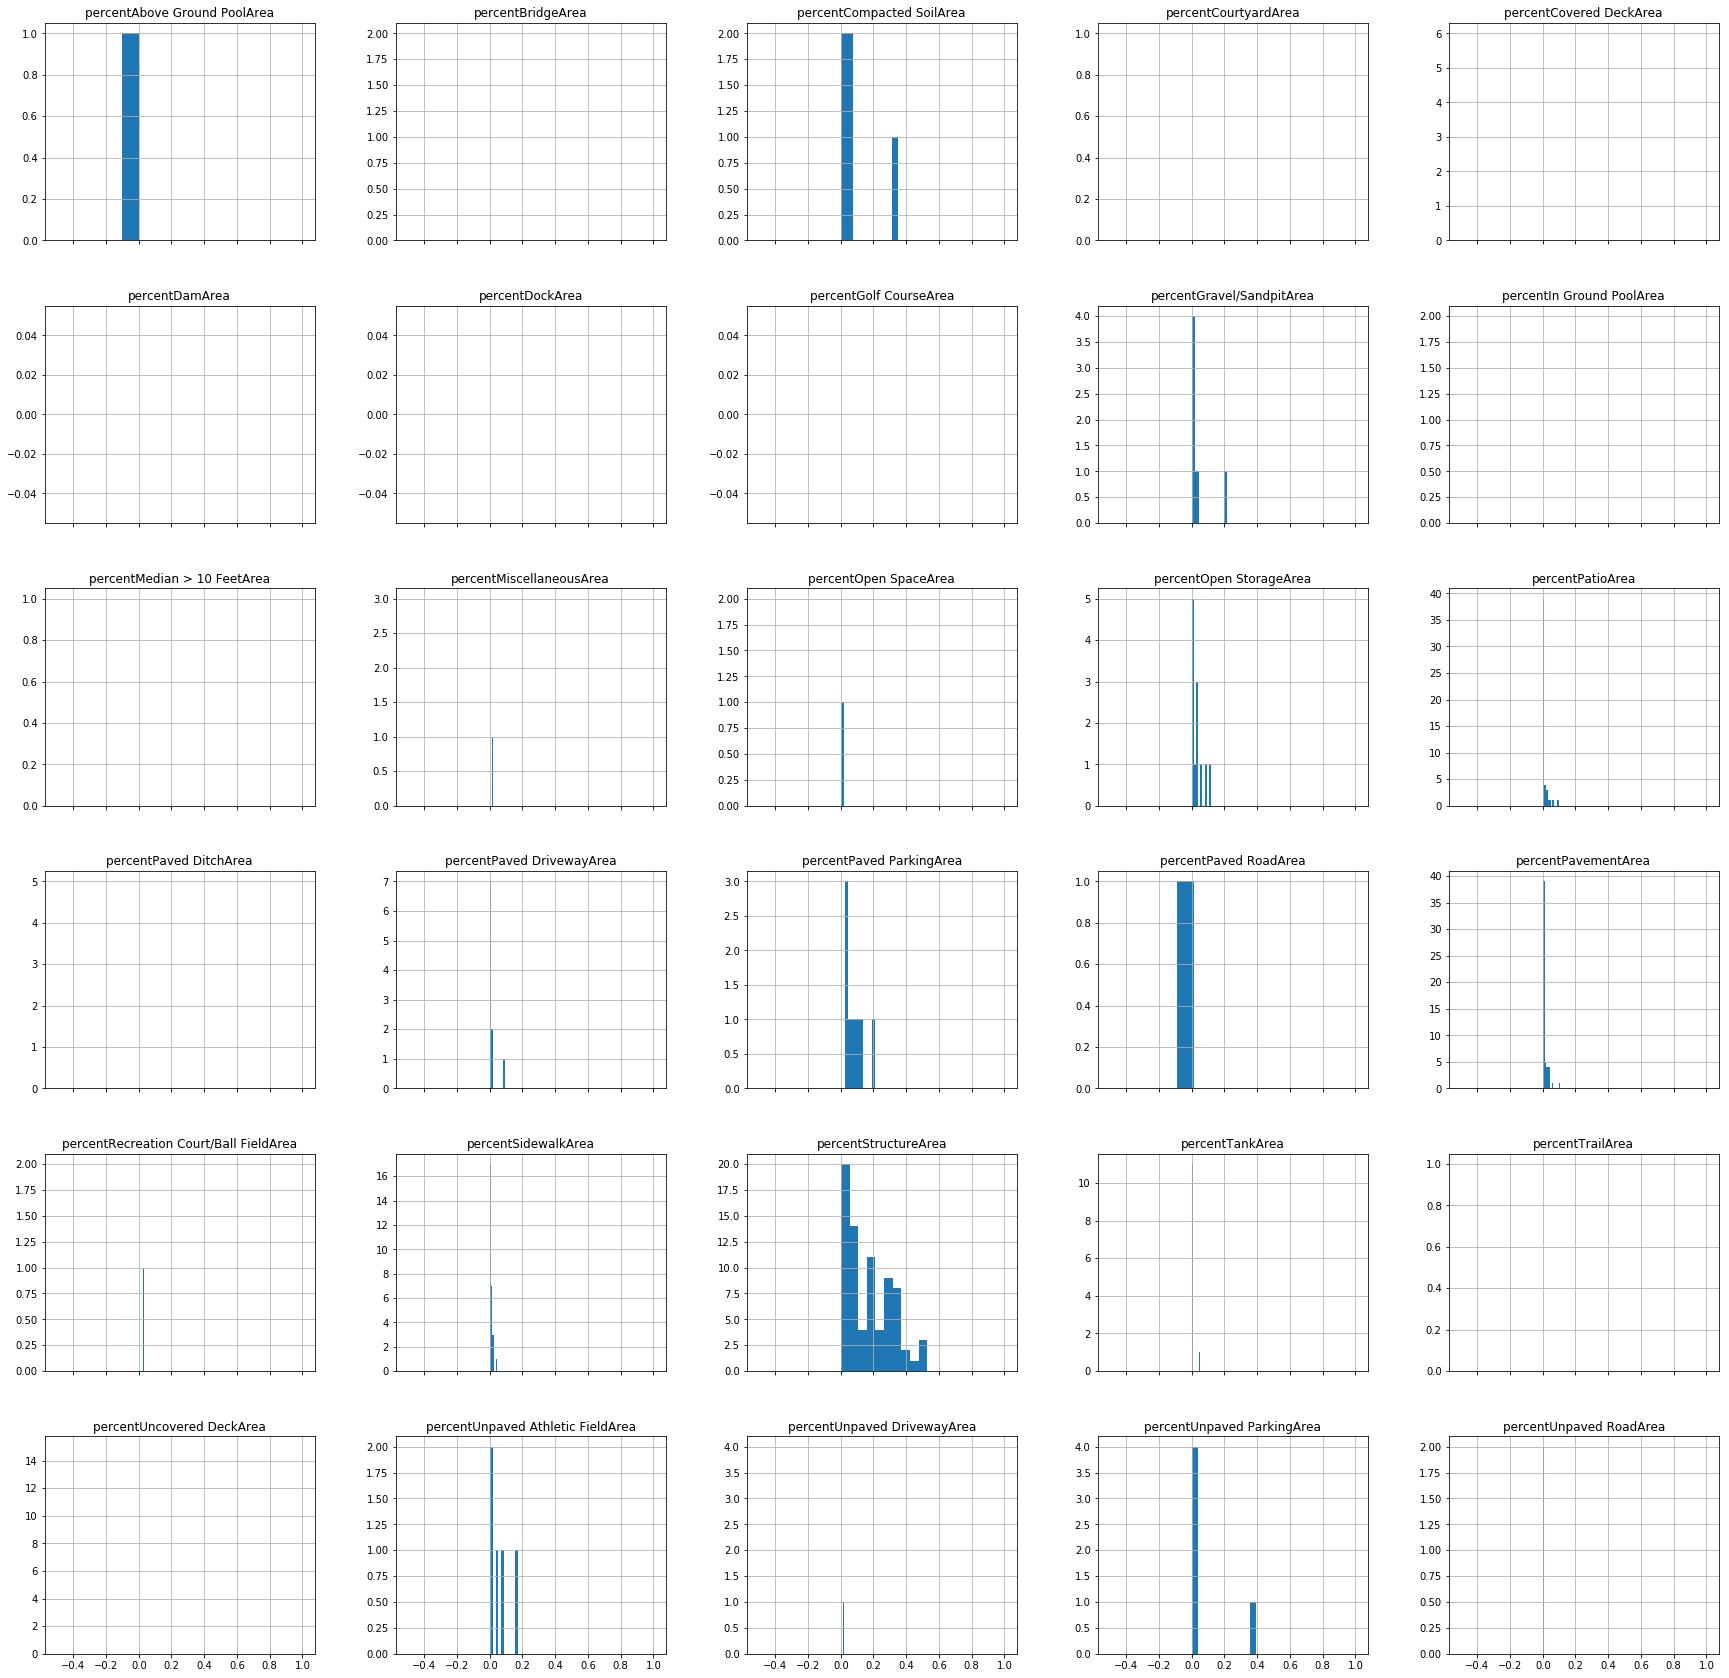

In [327]:
industrialDataArea.hist(figsize=(30,30), sharex=True)
plt.show()

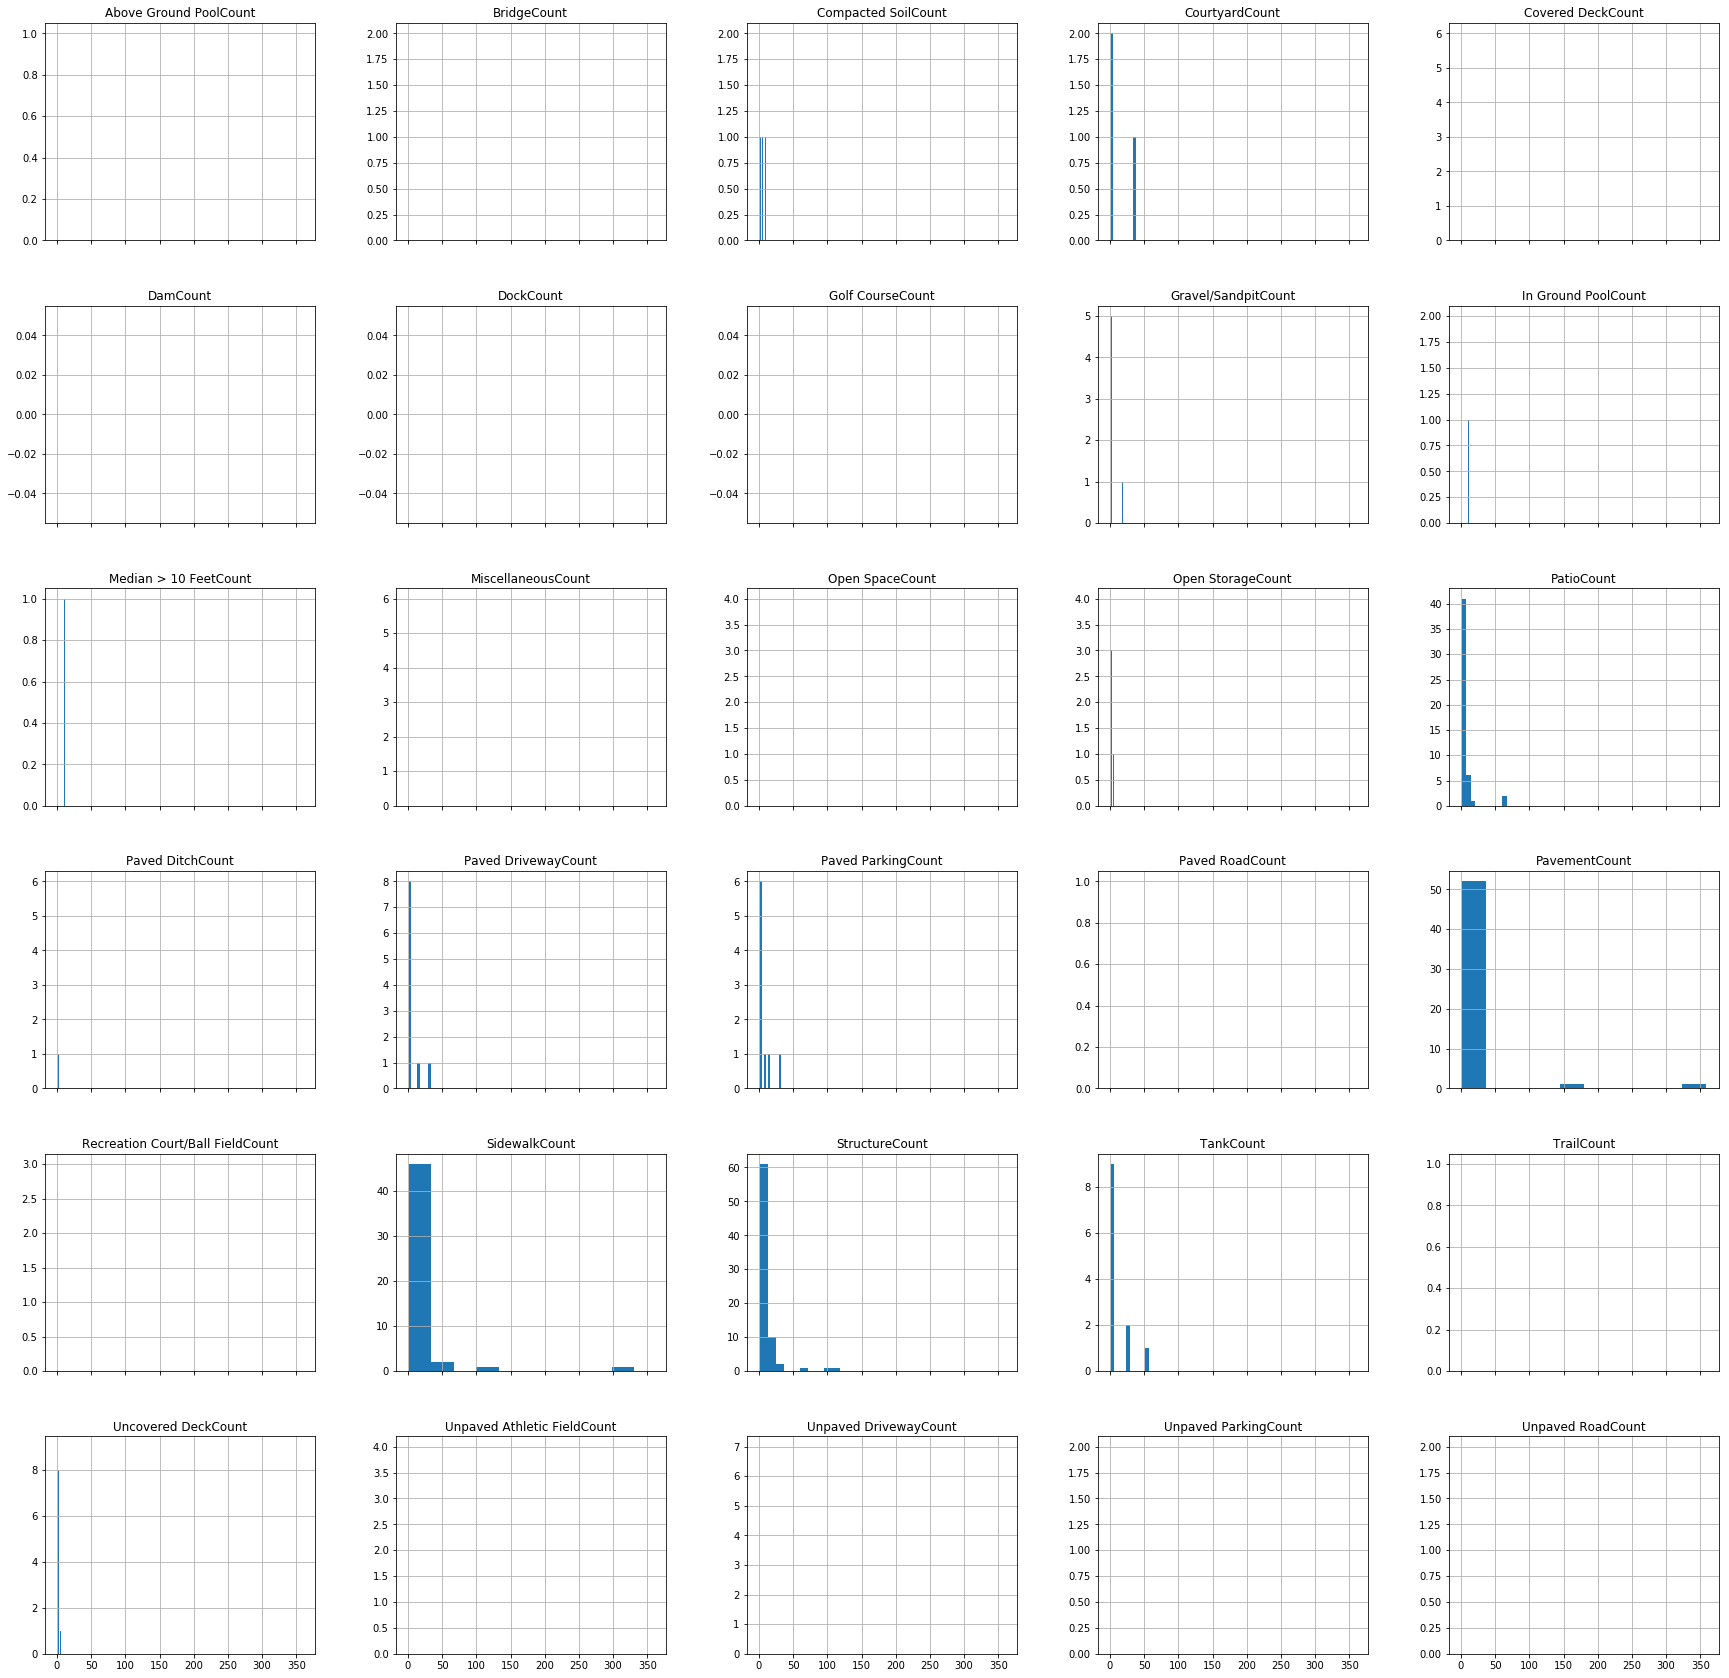

In [329]:
industrialDataCount.hist(figsize=(30,30), sharex=True)
plt.show()

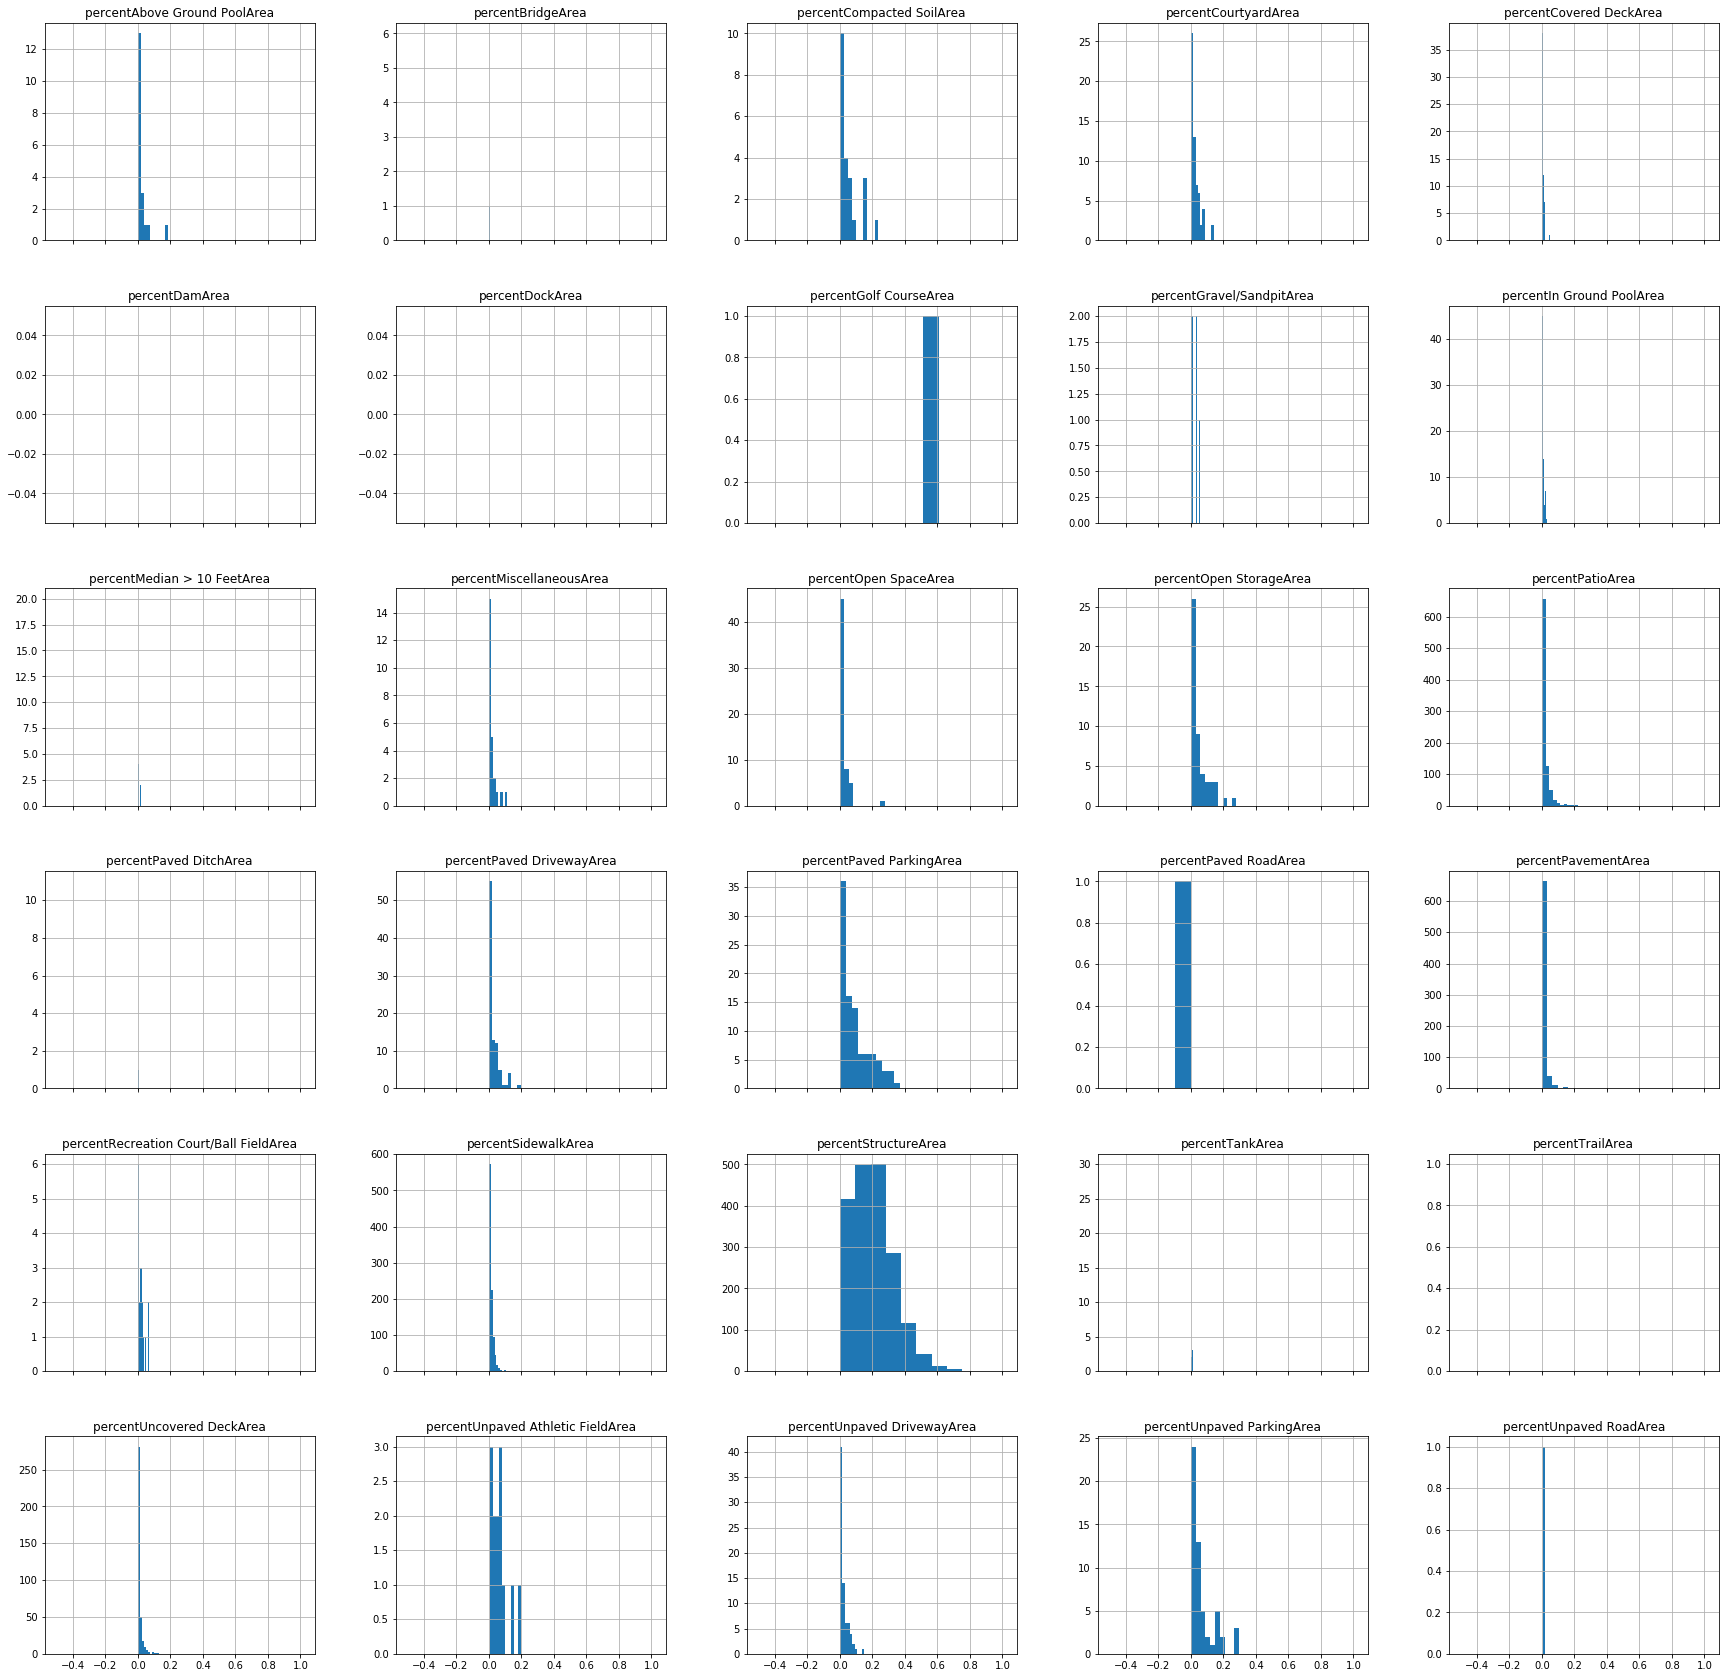

In [331]:
commercialDataArea.hist(figsize=(30,30), sharex=True)
plt.show()

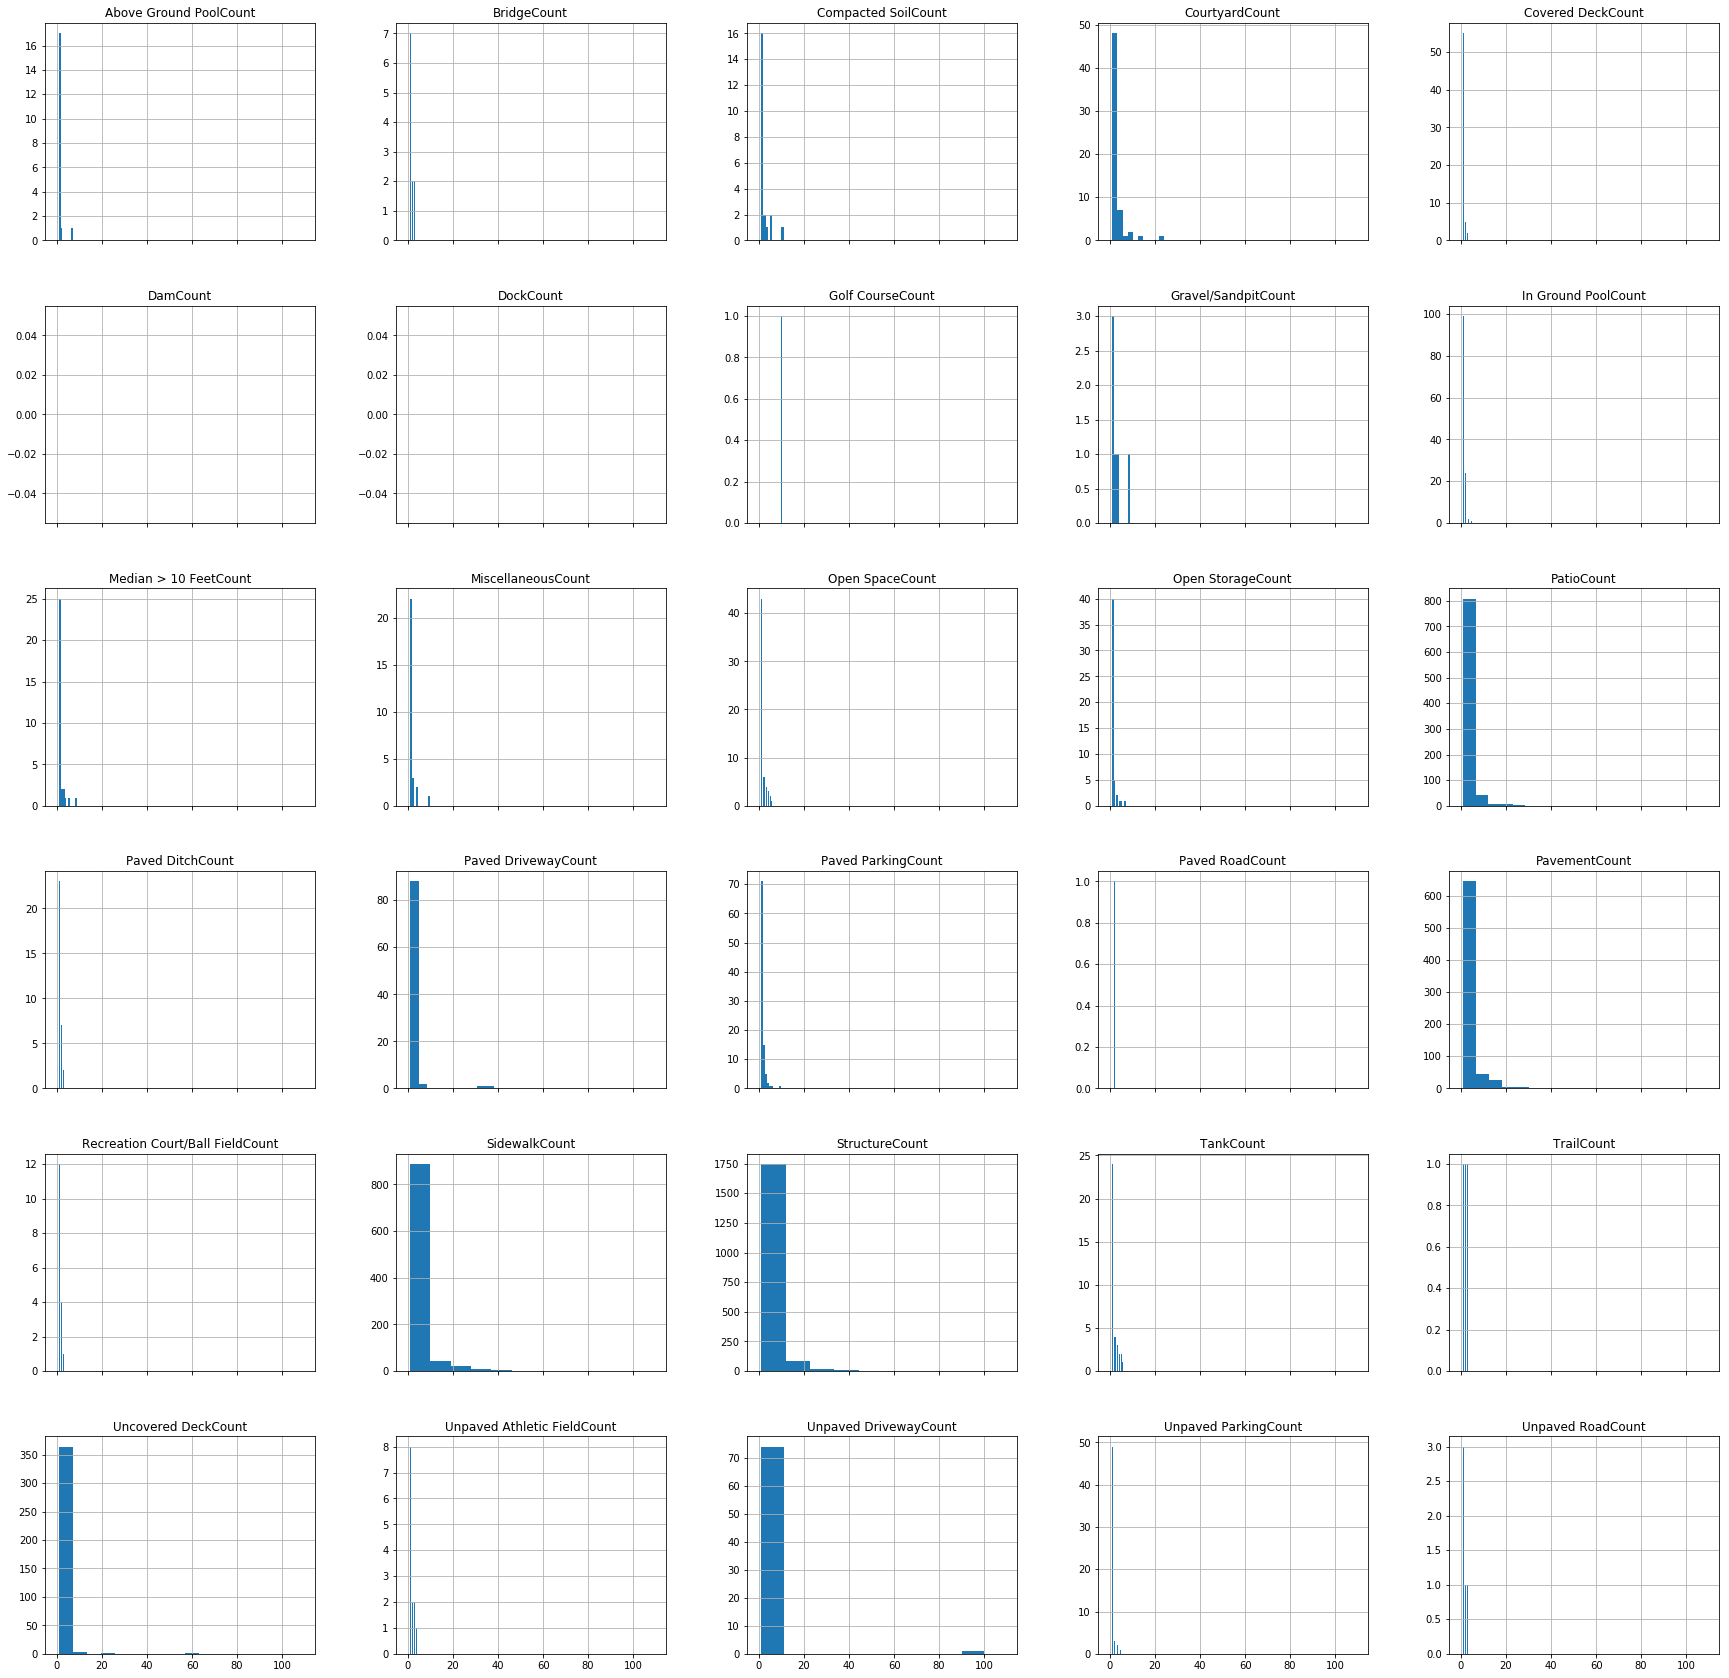

In [332]:
commercialDataCount.hist(figsize=(30,30), sharex=True)
plt.show()

Text(0, 0.5, 'Frequency')

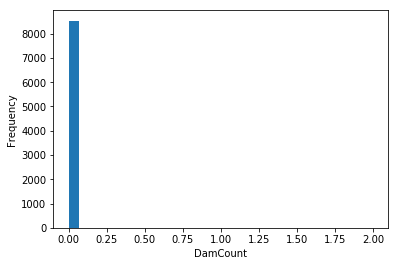

In [103]:
plt.hist(train[label].values, bins=30)
plt.xlabel(label)
plt.ylabel("Frequency")

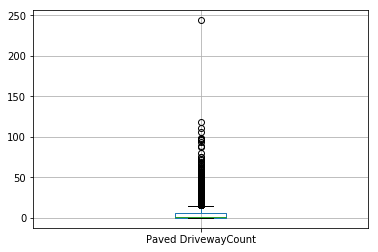

In [88]:
newTrain = train.drop([7850], axis=0)
newTrain.boxplot(column=[label])

In [8]:
print(train['zoneArea'][0])

6935.35696868561


In [37]:
zoneAreaBin = []
zoneAreaCol = []
one_std = train['zoneArea'].mean()+train['zoneArea'].std()
for value in train['zoneArea']:
    if(value <= one_std):
        zoneAreaBin.append("Small Area")
        zoneAreaCol.append("red")
    else:
        zoneAreaBin.append("Large Area")
        zoneAreaCol.append("blue")
train['zoneAreaBin'] = pd.Series(zoneAreaBin)
train['zoneAreaCol'] = pd.Series(zoneAreaCol)Side

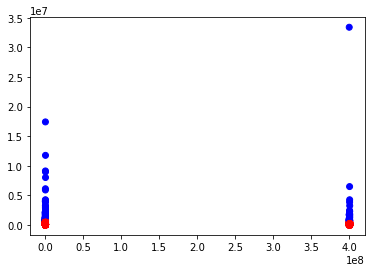

In [38]:
plt.scatter(train['zoneID'], train['zoneArea'], c=zoneAreaCol)

In [21]:
zSeries = pd.Series(zoneAreaBin)
zSeries.describe()

count           8548
unique             2
top       Small Area
freq            8284
dtype: object

In [10]:
train['zoneArea'].idxmax()

7850

In [26]:
train.iloc[7066]

zoneID                                         215404
zoneArea                                  1.17563e+07
SidewalkCount                                     343
percentSidewalkArea                         0.0464558
Paved ParkingCount                                 41
percentPaved ParkingArea                     0.255093
Paved DrivewayCount                                15
percentPaved DrivewayArea                  0.00716312
PavementCount                                     374
percentPavementArea                         0.0264803
PatioCount                                         67
percentPatioArea                           0.00801916
In Ground PoolCount                                12
percentIn Ground PoolArea                  0.00123451
TankCount                                           5
percentTankArea                           0.000641932
Unpaved DrivewayCount                               3
percentUnpaved DrivewayArea               0.000172726
Uncovered DeckCount         

In [15]:
validation = pd.read_csv('../data/processed/validation.csv')

In [166]:
list(train)

['zoneID',
 'zoneArea',
 'SidewalkCount',
 'percentSidewalkArea',
 'Paved ParkingCount',
 'percentPaved ParkingArea',
 'Paved DrivewayCount',
 'percentPaved DrivewayArea',
 'PavementCount',
 'percentPavementArea',
 'PatioCount',
 'percentPatioArea',
 'In Ground PoolCount',
 'percentIn Ground PoolArea',
 'TankCount',
 'percentTankArea',
 'Unpaved DrivewayCount',
 'percentUnpaved DrivewayArea',
 'Uncovered DeckCount',
 'percentUncovered DeckArea',
 'Compacted SoilCount',
 'percentCompacted SoilArea',
 'BridgeCount',
 'percentBridgeArea',
 'DockCount',
 'percentDockArea',
 'Above Ground PoolCount',
 'percentAbove Ground PoolArea',
 'Recreation Court/Ball FieldCount',
 'percentRecreation Court/Ball FieldArea',
 'Golf CourseCount',
 'percentGolf CourseArea',
 'Unpaved Athletic FieldCount',
 'percentUnpaved Athletic FieldArea',
 'Covered DeckCount',
 'percentCovered DeckArea',
 'Unpaved ParkingCount',
 'percentUnpaved ParkingArea',
 'CourtyardCount',
 'percentCourtyardArea',
 'Open SpaceCoun

In [194]:
train['PatioCount'].value_counts()

0      3367
1      1480
2       829
3       481
4       357
5       262
6       200
8       176
7       157
9       144
10      124
12      110
11      100
14       88
13       83
15       67
16       61
18       52
17       51
19       41
20       39
22       37
21       36
26       23
28       21
23       21
25       17
27       15
24       14
30        9
       ... 
39        3
33        3
47        3
37        3
38        3
45        2
56        2
76        2
53        2
43        2
67        2
70        2
104       1
72        1
48        1
80        1
46        1
57        1
74        1
122       1
78        1
51        1
55        1
44        1
140       1
62        1
69        1
77        1
54        1
63        1
Name: PatioCount, Length: 67, dtype: int64

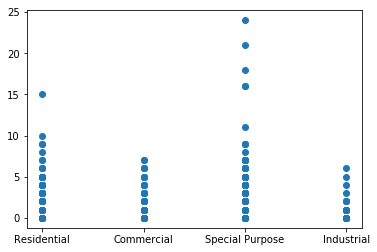

In [206]:
plt.scatter(train['zoneType'], )

In [162]:
gravelSandpit = []
dam = []
sideWalk = []
percentStructureArea = []
structCount = []

for i in train.index:
    gsVal = train.loc[i,'Gravel/SandpitCount']
    if gsVal > 0:
        gravelSandpit.append(1)
    else:
        gravelSandpit.append(0)
        
    damVal = train.loc[i, 'DamCount']
    if damVal > 0:
        dam.append(1)
    else:
        dam.append(0)
        
    structVal = train.loc[i, 'percentStructureArea']
    if structVal > train['percentStructureArea'].mean() + train['percentStructureArea'].quantile(q=0.75):
        percentStructureArea.append("Large")
    else:
        percentStructureArea.append("Small")
        
    scVal = train.loc[i, 'StructureCount']
    if scVal > train['StructureCount'].mean() + train['StructureCount'].quantile(q=0.75):
        structCount.append("Many")
    else:
        structCount.append("Few")

In [163]:
pd.Series(percentStructureArea).value_counts()

Small    8002
Large     546
dtype: int64

In [164]:
for i in train.index:
    urVal = train.loc[i, 'Unpaved RoadCount']
    if urVal > 0
        .append(1)
    else:
        sideWalk.append(0)

In [131]:
train['StructureCount'].mean() + train['StructureCount'].quantile(q=0.75)

27.819255966307907

In [170]:
unpavedRoad = []
for i in train.index:
    swVal = train.loc[i, 'Unpaved RoadCount']
    if scVal > 0:
        unpavedRoad.append(1)
    else:
        unpavedRoad.append(0)

In [180]:
trail = []
for i in train.index:
    tVal = train.loc[i, 'TrailCount']
    if tVal > 0:
        trail.append(1)
    else:
        trail.append(0)

In [184]:
pavedAlley = []
for i in train.index:
    pVal = train.loc[i, 'Paved AlleyCount']
    if pVal > 0:
        pavedAlley.append(1)
    else:
        pavedAlley.append(0)

In [207]:
structureRatio = []
for i in train.index:
    if train.loc[i, 'percentStructureArea'] == 0:
        structureRatio.append(0)
    else:
        sVal = train.loc[i, 'StructureCount']/train.loc[i, 'percentStructureArea']
        structureRatio.append(sVal)

In [213]:
recScore = []
for i in train.index:
    rVal = train.loc[i, 'Open SpaceCount']+train.loc[i, 'Unpaved Athletic FieldCount']+train['Recreation Court/Ball FieldCount']
    recScore.append(rVal)

In [218]:
train['recScore'] = recScore

In [ ]:
train['recScore'].describe()

In [195]:
structRatio = []

for i in train.index:
    sVal = train.loc[i, 'structureRatio']
    if sVal > (train['structureRatio'].mean() + train['structureRatio'].quantile(q=0.75)):
        structRatio.append('large')
    else:
        structRatio.append('small')

In [216]:
sidewalkArea = []

for i in train.index:
    sVal = train.loc[i, 'percentSidewalkArea']
    if sVal > (train['percentSidewalkArea'].mean() + train['percentSidewalkArea'].quantile(q=0.75)):
        sidewalkArea.append('large')
    else:
        sidewalkArea.append('small')

In [220]:
recreationScore = []

for i in train.index:
    rVal = train.loc[i, 'recScore']
    if rVal > train['recScore'].mean() + train['recScore'].quantile(q=0.75):
        recreationScore.append('large')
    else:
        recreationScore.append('small')

TypeError: Could not convert 0        920
1        920
2        920
3        920
4        920
5        920
6        920
7        920
8        920
9        920
10       920
11       920
12       920
13       920
14       920
15       920
16       920
17       920
18       920
19       920
20       920
21       920
22       920
23       920
24       920
25       920
26       920
27       920
28       920
29       920
        ... 
8518     920
8519     920
8520     920
8521     920
8522     920
8523     920
8524     920
8525     920
8526     920
8527     920
8528     920
8529     920
8530     920
8531     920
8532     920
8533     920
8534     920
8535     920
8536     920
8537     920
8538     920
8539     920
8540     920
8541     920
8542     920
8543     920
8544     920
8545     920
8546    9468
8547     920
Name: Recreation Court/Ball FieldCount, Length: 8548, dtype: int64 to numeric

In [161]:
newTrainData = pd.DataFrame()

In [ ]:
newTrainData['structCount'] = structCount
newTrainData['percentStructArea'] = percentStructureArea
newTrainData['sidewalk'] = sideWalk
newTrainData['dam'] = dam
newTrainData['gravelSandpit'] = gravelSandpit
newTrainData['unpavedRoad'] = unpavedRoad
newTrainData['trail'] = trail
newTrainData['pavedAlley'] = pavedAlley
newTrainData['structRatio'] = structRatio
newTrainData['sidewalkArea'] = sidewalkArea